Dataset: https://scholar.google.com/citations?view_op=list_works&hl=en&user=EN3OcMsAAAAJ#d=gs_md_cita-d&u=%2Fcitations%3Fview_op%3Dview_citation%26hl%3Den%26user%3DEN3OcMsAAAAJ%26citation_for_view%3DEN3OcMsAAAAJ%3AqjMakFHDy7sC%26tzom%3D420

In [1]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'
train_size = 20000  # have 26710 records will use 20k for training and the rest for validation

In [3]:
with open('sarcasm.json','r') as f:
    data = json.load(f)
sentences = []
labels = []
for i in data:
    sentences.append(i['headline'])
    labels.append(i['is_sarcastic'])

In [4]:
train_sentences = sentences[:train_size]
train_labels=labels[:train_size]
test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #OOV is out of vocabulary
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index #dictionary corpus {'word':index}

sequences = tokenizer.texts_to_sequences(train_sentences) #list of index for sentences will use word_index here 
padded = pad_sequences(sequences,truncating=trunc_type,maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences) #testing is sequenced on training vocab so might find <oov>
test_padded = pad_sequences(test_sequences,truncating=trunc_type,maxlen=max_length)

In [6]:
#Base model with embedding
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                12312     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 172,337
Trainable params: 172,337
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 30
base = model.fit(padded, np.asarray(train_labels), epochs=num_epochs, validation_data=(test_padded, np.asarray(test_labels)),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 5s - loss: 0.4575 - accuracy: 0.7735 - val_loss: 0.3385 - val_accuracy: 0.8536
Epoch 2/30
20000/20000 - 3s - loss: 0.2065 - accuracy: 0.9202 - val_loss: 0.3497 - val_accuracy: 0.8542
Epoch 3/30
20000/20000 - 3s - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.4431 - val_accuracy: 0.8413
Epoch 4/30
20000/20000 - 4s - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.4967 - val_accuracy: 0.8399
Epoch 5/30
20000/20000 - 3s - loss: 0.0107 - accuracy: 0.9980 - val_loss: 0.5664 - val_accuracy: 0.8426
Epoch 6/30
20000/20000 - 3s - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.6290 - val_accuracy: 0.8426
Epoch 7/30
20000/20000 - 3s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.6847 - val_accuracy: 0.8426
Epoch 8/30
20000/20000 - 3s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.7473 - val_accuracy: 0.8380
Epoch 9/30
20000/20000 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.7907 - val_accuracy: 0.8384
Epoch 10/30
200

In [8]:
#Visualization
import matplotlib.pyplot as plt
def plot_graphs(history,string,title):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epoch')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(title)
    plt.show()

In [9]:
#base_LSTM
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
base_LSTM = model1.fit(padded, np.asarray(train_labels), epochs=num_epochs, validation_data=(test_padded, np.asarray(test_labels)),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 25s - loss: 0.4250 - accuracy: 0.7883 - val_loss: 0.3491 - val_accuracy: 0.8481
Epoch 2/30
20000/20000 - 15s - loss: 0.2268 - accuracy: 0.9095 - val_loss: 0.3483 - val_accuracy: 0.8559
Epoch 3/30
20000/20000 - 15s - loss: 0.1478 - accuracy: 0.9439 - val_loss: 0.3701 - val_accuracy: 0.8450
Epoch 4/30
20000/20000 - 15s - loss: 0.0904 - accuracy: 0.9694 - val_loss: 0.5100 - val_accuracy: 0.8435
Epoch 5/30
20000/20000 - 15s - loss: 0.0565 - accuracy: 0.9811 - val_loss: 0.6250 - val_accuracy: 0.8366
Epoch 6/30
20000/20000 - 15s - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.7263 - val_accuracy: 0.8328
Epoch 7/30
20000/20000 - 15s - loss: 0.0255 - accuracy: 0.9906 - val_loss: 0.8363 - val_accuracy: 0.8343
Epoch 8/30
20000/20000 - 16s - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.9337 - val_accuracy: 0.8313
Epoch 9/30
20000/20000 - 16s - loss: 0.0147 - accuracy: 0.9949 - val_loss: 1.0818 - val_accuracy: 0.8296
Epoch 

In [11]:
#base_Conv
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 28, 128)           10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
base_Convo = model2.fit(padded, np.asarray(train_labels), epochs=num_epochs, validation_data=(test_padded, np.asarray(test_labels)),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 4s - loss: 0.4495 - accuracy: 0.7677 - val_loss: 0.3451 - val_accuracy: 0.8450
Epoch 2/30
20000/20000 - 4s - loss: 0.2388 - accuracy: 0.9055 - val_loss: 0.3763 - val_accuracy: 0.8404
Epoch 3/30
20000/20000 - 4s - loss: 0.1722 - accuracy: 0.9344 - val_loss: 0.3934 - val_accuracy: 0.8438
Epoch 4/30
20000/20000 - 4s - loss: 0.1290 - accuracy: 0.9531 - val_loss: 0.4632 - val_accuracy: 0.8401
Epoch 5/30
20000/20000 - 4s - loss: 0.0971 - accuracy: 0.9671 - val_loss: 0.5242 - val_accuracy: 0.8348
Epoch 6/30
20000/20000 - 4s - loss: 0.0722 - accuracy: 0.9762 - val_loss: 0.5979 - val_accuracy: 0.8308
Epoch 7/30
20000/20000 - 4s - loss: 0.0545 - accuracy: 0.9822 - val_loss: 0.6825 - val_accuracy: 0.8302
Epoch 8/30
20000/20000 - 4s - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.7839 - val_accuracy: 0.8268
Epoch 9/30
20000/20000 - 4s - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.9034 - val_accuracy: 0.8226
Epoch 10/30
200

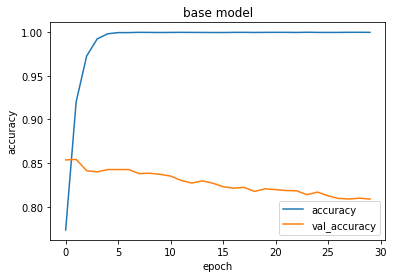

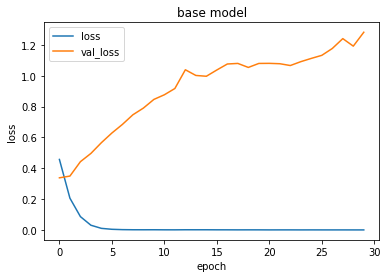

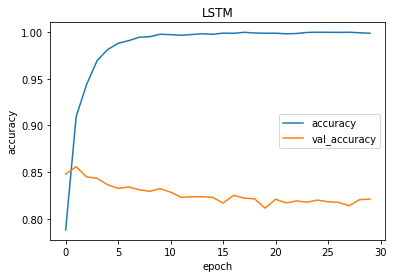

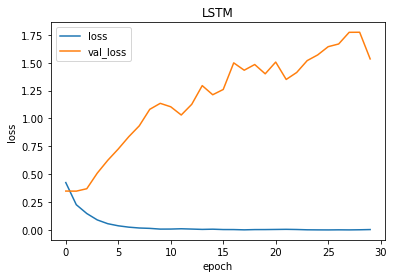

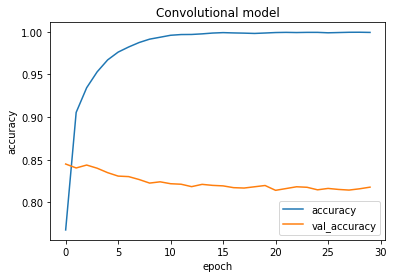

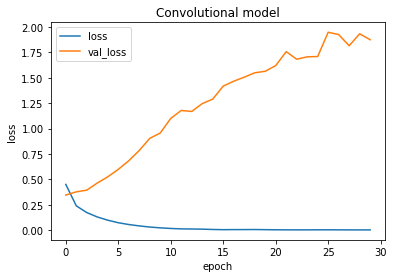

In [13]:
plot_graphs(base,'accuracy','base model')
plot_graphs(base,'loss','base model')
plot_graphs(base_LSTM,'accuracy','LSTM')
plot_graphs(base_LSTM,'loss','LSTM')
plot_graphs(base_Convo,'accuracy','Convolutional model')
plot_graphs(base_Convo,'loss','Convolutional model')

#### Analysis
All of the models show signs of overfitting. This makes sense as our training dataset was quite small, and with a small number of words. Embeddings derived from this may be over generalized also

Training computation for each epoch:
- Base model ~ 5s
- LSTM model ~ 20s
- Convolutional model ~ 5s